In [31]:
import pandas as pd
import random
import re
import matplotlib.pyplot as plt
import pickle

In [32]:
# with open('../cs7650_project_data/biased.full') as f:
#     count = 0
#     for line in f:
#         if count < 10:
#             for i,item in enumerate(re.sub(' ##','',line).split('\t')):
#                 print(i,item)
#         count += 1

In [34]:
pairs_full = []
with open('../cs7650_project_data/biased.full') as f:
    for line in f:
        items = re.sub(' ##','',line).split('\t')
        if len(items[1].split())< 100:
            pairs_full.append((items[0],items[1],items[2]))
print('len(pairs_full)',len(pairs_full))


len(pairs_full) 180184


In [35]:
# # filter out delete more than one word and insert
# idx_del2_ins = []
# for i,pair in enumerate(pairs_full):
#     a,b = pair
#     diff = simplediff.string_diff(a,b)
#     if len(diff) is 4:
#         _,delete,_,_ = diff
#         _,c = delete
#         if len(c) > 1:
#             idx_del2_ins.append(i)
# print('# of delete more than 1 and insert pairs:', len(idx_del2_ins))

In [36]:
idx_filtered = None

In [37]:
idx_filtered = pickle.load(open( "./idx_filtered", "rb" ) )

In [38]:
if idx_filtered:
    pairs_short = []
    for i in idx_filtered:
        pairs_short.append(pairs_full[i])
    n_choice = len(pairs_short)
else:
    n_choice = int(len(pairs_full)/1) # choose a small size to test result
    pairs_short = random.sample(pairs_full,k=n_choice) # bias neutral pairs

Randomly mix biased and neutral statement together with 0 as neutral and 1 as biased

In [39]:
bias_sent = [pair[1] for pair in pairs_short]
neutral_sent = [pair[2] for pair in pairs_short]

(array([ 4039., 11025., 12462.,  7658.,  4929.,  2333.,  1372.,   638.,
          348.,   183.]),
 array([ 4. , 13.5, 23. , 32.5, 42. , 51.5, 61. , 70.5, 80. , 89.5, 99. ]),
 <a list of 10 Patch objects>)

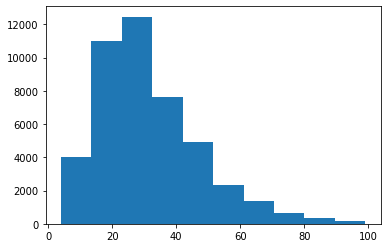

In [40]:
plt.hist(list(map(lambda x: len(x.split()),bias_sent)))

In [41]:
data_pairs = list(zip(bias_sent,[1]*n_choice))
data_pairs.extend(list(zip(neutral_sent, [0]*n_choice)))
random.shuffle(data_pairs)

## make csv file

In [42]:
# split train test pairs
n_train = len(data_pairs)
split = int(.9*n_train)
print('pairs len:', n_train)
print('split:',split)

pairs len: 89974
split: 80976


In [43]:
df = pd.DataFrame(index=range(split),columns=["id","text","biasness",'dummy1','dummy2','dummy3','dummy4','dummy5'])
df_test = pd.DataFrame(index=range(split,n_train),columns=["id","text","biasness",'dummy1','dummy2','dummy3','dummy4','dummy5'])

In [44]:
## make sytle consistant with Bert Code required, 6 columns for features
for i in range(n_train):
    if i < split:
        item = (i,data_pairs[i][0],data_pairs[i][1])
        item+=tuple(random.choices([0,1],k=5))
        df.loc[i,] = item
    else:
        item = (i,data_pairs[i][0],data_pairs[i][1])
        item+=tuple(random.choices([0,1],k=5))
        df_test.loc[i-split,] = item

In [45]:
df.to_csv('../Bert-Multi-Label-Text-Classification/pybert/dataset/train_sample.csv',index=False)

In [18]:
# df_test.to_csv('./Bert-Multi-Label-Text-Classification/pybert/dataset/test.csv',index=False)

In [19]:
df

,id,text,biasness,dummy1,dummy2,dummy3,dummy4,dummy5
0,0,this extraordinary voyage became part of seafa...,1,1,1,0,0,1
1,1,mount holyoke college is a prestigious liberal...,1,1,0,1,1,1
2,2,an early adversary of popper ' s critical rati...,0,1,1,0,0,1
3,3,david ray griffin is a resident of santa barba...,0,1,1,0,0,0
4,4,"for that reason the kmt attempted to "" siniciz...",0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
32663,32663,"mecca cola , an arab - israeli activist bevera...",0,0,1,0,1,0
32664,32664,"as he informs his wife , heather ( lesley manv...",1,0,1,0,0,0
32665,32665,she sparked controversy among u . s . leftists...,1,0,0,0,1,0
32666,32666,it was said that for the first eight days of c...,0,0,0,1,1,1


In [20]:
df_test

,id,text,biasness,dummy1,dummy2,dummy3,dummy4,dummy5
0,32668,inside he discovers seven cassette tapes recor...,0,1,0,0,1,1
1,32669,common law copyright is the legal doctrine whi...,0,1,0,0,0,1
2,32670,stroh ' s ice cream is positioned as a premium...,0,1,0,0,1,1
3,32671,the practitioner then is said to act as a chan...,0,0,1,0,0,1
4,32672,"however , both appear briefly in the film , an...",1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
3625,36293,some linguists place it in the altaic language...,0,0,0,1,1,0
3626,36294,"clifton powell ( born march 16 , 1956 ) is an ...",1,0,0,0,0,1
3627,36295,"many are vegan , due to their perceived violen...",0,0,1,0,1,0
3628,36296,bbc costume and wigs - trading as part of bbc ...,1,1,0,0,1,1


## Process AAAI 20 biased data

In [79]:
import re

In [80]:
pairs_full = []
with open('../cs7650_project_data/biased.full') as f:
    for line in f:
        items = line.split('\t')
        pairs_full.append((items[0],re.sub(' ##','',items[1]),re.sub(' ##','',items[2])))

In [82]:
len(pairs_full)

181496